In [1]:
import pandas as pd
from azure.cognitiveservices.language.luis.runtime import LUISRuntimeClient
from msrest.authentication import CognitiveServicesCredentials

In [2]:
luisappid = os.environ['LUIS_APP_ID']
luisapikey = os.environ['LUIS_API_KEY']
luisapihostname = os.environ['LUIS_API_HOST_NAME']

In [2]:
df_data = pd.read_json('../data/data_test.json', orient='records')

In [3]:
df_data.head()

,text,entities,intent
0,Can you also check check Athens for me?,"[{'startPos': 25, 'endPos': 30, 'entity': 'dst...",book
1,2 adults and 6 kids,"[{'startPos': 13, 'endPos': 13, 'entity': 'n_c...",book
2,would you have a longer package if we departed...,"[{'startPos': 52, 'endPos': 57, 'entity': 'or_...",book
3,Please book that one!,"[{'startPos': 7, 'endPos': 10, 'entity': 'inte...",book
4,I need to get to Beijing so I can get a pictur...,"[{'startPos': 17, 'endPos': 23, 'entity': 'dst...",book


In [4]:
for it, sample in df_data.iterrows():
    if it < 40:
        #print(sample.to_dict())
        entity = sample.to_dict()['entities']

In [5]:
def extract_in_sentence(entityLabels, text):
    dict_list = {}
    for entity in entityLabels:
        word, name = extract_entity(entity['startPos'], entity['endPos'], entity['entity'], text)
        dict_list[word] = name
    dict_list['text'] = text
    return dict_list

In [6]:
def extract_entity(start, end, name, text):
    word = text[start:end+1]
    return name, word

In [7]:
df_list = []
for it, sample in df_data.iterrows():
    if it < 40:
        df_list.append({})
        df_list[it].update(extract_in_sentence(sample.to_dict()['entities'], sample.to_dict()['text']))

In [8]:
df_list

[{'dst_city': 'Athens', 'text': 'Can you also check check Athens for me?'},
 {'n_children': '6', 'text': '2 adults and 6 kids'},
 {'or_city': 'puebla',
  'min_duration': 'longer',
  'text': 'would you have a longer package if we departed from puebla instead?'},
 {'intent': 'book', 'text': 'Please book that one!'},
 {'dst_city': 'Beijing',
  'text': 'I need to get to Beijing so I can get a picture of Madonna and her huge popstar friend, Greg.'},
 {'intent': 'book', 'text': "Great! Let's book it!"},
 {'max_duration': '3',
  'or_city': 'San Antonio.',
  'budget': '400',
  'text': "good i have 3 days off and wanna leave San Antonio. i only have 400 bucks so ill prob have to take a bus but if u can find me a flight that'd be sweet as hell. i'll go wherever, whenever"},
 {'or_city': 'berlin',
  'dst_city': 'milan.',
  'text': 'from berlin to milan. what is available'},
 {'category': '5', 'text': 'I will only look at 5 star hotels.'},
 {'n_adults': 'me and 7 friends',
  'or_city': 'Sydney',
 

In [10]:
app_id = luisappid
predictionKey = luisapikey
predictionEndpoint = "https://" + luisapihostname


In [11]:
#predictionRequest = {
#    "query": df_list[39]['text']}
runtimeCredentials = CognitiveServicesCredentials(predictionKey)
clientRuntime = LUISRuntimeClient(endpoint=predictionEndpoint, credentials=runtimeCredentials)
#predictionResponse = clientRuntime.prediction.resolve(app_id, query=predictionRequest)

In [12]:
#df_list[39]['text']

In [13]:
    #runtimeCredentials = CognitiveServicesCredentials(predictionKey)
    #clientRuntime = LUISRuntimeClient(endpoint=predictionEndpoint, credentials=runtimeCredentials)

In [14]:
list_response = []

In [15]:
for it in range(8):
    list_response.append({})
    predictionRequest = {
    "query": df_list[it+30]['text']}
    predictionResponse = clientRuntime.prediction.resolve(app_id, query=predictionRequest)
    for x in range(len(predictionResponse.entities)):
        list_response[it][predictionResponse.entities[x].type] = \
        predictionResponse.entities[x].entity

In [16]:
list_response

[{'intent': 'book'},
 {'max_duration': '4 day',
  'builtin.datetimeV2.duration': '4 day',
  'builtin.number': '4'},
 {'or_city': 'tijuana ,', 'builtin.geographyV2.city': 'tijuana'},
 {'n_adults': 'one', 'builtin.number': 'one'},
 {'dst_city': 'santos',
  'n_adults': 'with a friend .',
  'builtin.geographyV2.city': 'santos'},
 {'dst_city': 'queenstown',
  'or_city': 'fort lauderdale',
  'builtin.geographyV2.city': 'queenstown'},
 {'max_duration': '8 days',
  'or_city': 'dallas .',
  'str_date': 'september 6',
  'builtin.datetimeV2.duration': '8 days',
  'builtin.datetimeV2.daterange': 'starting on september 6',
  'builtin.number': '6'},
 {'budget': '2800',
  'n_adults': 'just me .',
  'builtin.geographyV2.continent': 'south america',
  'builtin.number': '2800'}]

In [17]:
df_list[30:38]

[{'intent': 'book', 'text': 'Would I still be able to book that package?'},
 {'max_duration': '4 day', 'text': 'I want to go on a 4 day trip'},
 {'or_city': 'Tijuana,', 'text': 'I am in Tijuana, send me anywhere nice!'},
 {'n_adults': 'one', 'text': 'Great. Book for one adult.'},
 {'n_adults': 'with a friend.',
  'dst_city': 'Santos',
  'text': 'I’m traveling with a friend. Santos then'},
 {'or_city': 'Fort Lauderdale',
  'text': 'She lives in Fort Lauderdale and needs to go to Queenstown'},
 {'max_duration': '8 days',
  'str_date': 'september 6',
  'or_city': 'dallas.',
  'text': 'I have 8 days for vacation starting on september 6 from dallas. What can you offer me?'},
 {'n_adults': 'just me.',
  'budget': '2800',
  'text': "Yeah just me. I've just spent all this money backpacking around South America, so I've only got 2800 left. Can you find something with that?"}]

In [18]:
import re

In [57]:
table = {}
#table['tests'] = 0
for it in range(8):
    for key in df_list[30 + it].keys():
        real = ''
        predict = ''
        if not key == 'text':
            if not key in table.keys():
                table[key] = [0, 0, 0, 0, 0]  # TP FP TN FN SUM
            if key in list_response[it].keys():
                #table['tests'] += 1
                table[key][4] += 1  # Compte le nombre total d’apparition
                #print(key, ''.join(re.findall('\w*', df_list[it + 30][key])).lower())
                #print(key, ''.join(re.findall('\w*', list_response[it][key])).lower())
                real = ''.join(re.findall('\w*', df_list[it + 30][key])).lower()
                predict = ''.join(re.findall('\w*', list_response[it][key])).lower()
                if real == predict:
                    table[key][0] += 1  # Compte le nombre de bonne prédiction
                else:
                    table[key][1] += 1
            else:
                table[key][1] += 1
                table[key][4] += 1
    for key in list_response[it].keys():
        real = ''
        predict = ''
        if (not key == 'text') & (not 'builtin' in key):
            if not key in table.keys():
                table[key] = [0, 0, 0, 0, 0]  # TP FP TN FN SUM 
            if key in df_list[30 + it].keys():
                #table['tests'] += 1
                table[key][4] += 1  # Compte le nombre total d’apparition
                #print(key, ''.join(re.findall('\w*', df_list[it + 30][key])).lower())
                #print(key, ''.join(re.findall('\w*', list_response[it][key])).lower())
                real = ''.join(re.findall('\w*', df_list[it + 30][key])).lower()
                predict = ''.join(re.findall('\w*', list_response[it][key])).lower()
                if real == predict:
                    table[key][2] += 1  # Compte le nombre de bonne prédiction
                else:
                    table[key][3] += 1
            else:
                table[key][3] += 1
                table[key][4] += 1


In [58]:
import matplotlib.pyplot as plt

In [59]:
table

{'intent': [1, 0, 1, 0, 2],
 'max_duration': [2, 0, 2, 0, 4],
 'or_city': [3, 0, 3, 0, 6],
 'n_adults': [3, 0, 3, 0, 6],
 'dst_city': [1, 0, 1, 1, 3],
 'str_date': [1, 0, 1, 0, 2],
 'budget': [1, 0, 1, 0, 2]}

In [60]:
df = pd.DataFrame.from_dict(table, orient='index', columns=['TP', 'FP', 'TN', 'FN', 'Total'])

In [61]:
df

,TP,FP,TN,FN,Total
intent,1,0,1,0,2
max_duration,2,0,2,0,4
or_city,3,0,3,0,6
n_adults,3,0,3,0,6
dst_city,1,0,1,1,3
str_date,1,0,1,0,2
budget,1,0,1,0,2


In [68]:
import seaborn as sns
import numpy as np

<AxesSubplot:>

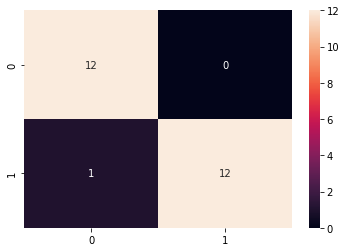

In [79]:
sns.heatmap(np.array(df[['TP','FP','FN','TN']].sum()).reshape(2,2), annot=True)

Sur un petit échantillon les résultats sont bons. Pour faire un test sur plus de prédiction, nous devons utiliser l’interface LUIS dans le portail Azure.

In [85]:
df[['TP']].sum()[0]

12

In [86]:
TP = df[['TP']].sum()[0]
FP = df[['FP']].sum()[0]
FN = df[['FN']].sum()[0]
TN = df[['TN']].sum()[0]

In [89]:
precision = (TP / (FP+TP))
recall = (TP / (FN+TP))
f1_score = 2 * (precision * recall) / (precision + recall)

In [90]:
precision, recall, f1_score

(1.0, 0.9230769230769231, 0.9600000000000001)